# Name: Mohamed Khaled Samir

# Task - 02  (The Spark Foundation)

# In this task, We have to develop a classifier for the 'Iris' dataset and predict an optimum number of clusters and  visualizing them.

In [62]:
#impoting the Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

In [3]:
#importing the dataset using pandas
data= pd.read_csv('iris.csv')

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

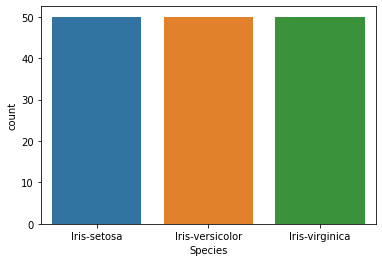

In [68]:
sns.countplot(x=data['Species'])
plt.show()

# Dimensional Reduction

In [47]:
#scaling data
scaler=StandardScaler()
sample=data.iloc[:,1:5].values
data_scaler=scaler.fit_transform(sample)


In [49]:
pca= PCA(n_components=2)

feature = pca.fit_transform(data_scaler)

print(feature.shape)

(150, 2)


# Visualising the Dataset

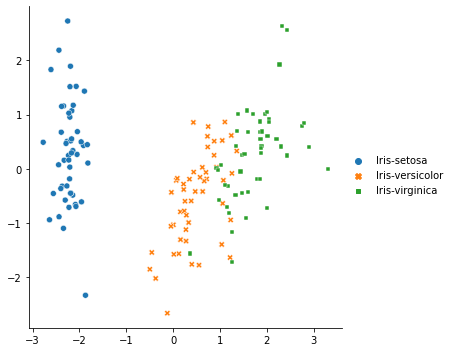

In [79]:
x=feature[:,0]
y=feature[:,1]
species=data['Species'].values
sns.relplot(x=x,y=y,data=feature,kind='scatter',hue=species,style=species)
plt.show()

## Finding the optimum of clusters for K-means clssification 
## and Plotting the results

C:\Users\M.Khaled\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


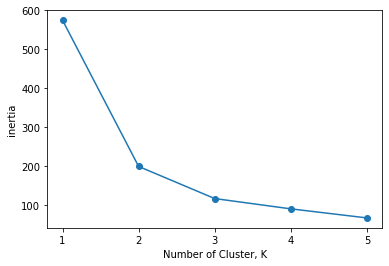

In [50]:

inertias=[]
for k in range(1,6):
    model=KMeans(n_clusters= k)
    model.fit(feature)
    inertias.append(model.inertia_)
    
plt.plot(range(1,6),inertias,'-o')
plt.xlabel('Number of Cluster, K')
plt.ylabel('inertia')
plt.xticks(range(1,6))
plt.show()

In [55]:
model=KMeans(n_clusters=3)
labels=model.fit_predict(feature)
df = pd.DataFrame({'labels':labels , 'Species':data['Species']})

pd.crosstab(df['labels'], df['Species'])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,0,11,36
1,50,0,0
2,0,39,14


# Visualising the clusters

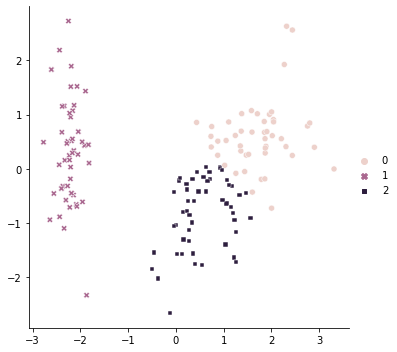

In [80]:
sns.relplot(x=x,y=y,data=feature,kind="scatter",hue=labels,style=labels)
plt.show()